In [49]:
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score


In [50]:
X,y = make_regression(n_samples=100,n_features=1,n_informative=1,n_targets=1,noise=20,random_state=13)

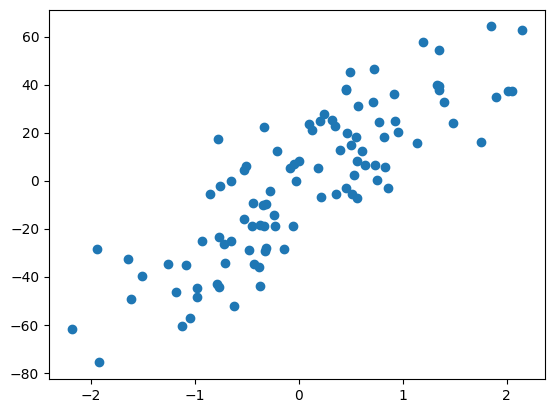

In [51]:
plt.scatter(X,y)

plt.show()

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state =2)

In [73]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()


In [74]:
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [75]:
lr.coef_,lr.intercept_

(array([28.12597332]), np.float64(-2.2710144261783825))

In [76]:
np.mean(cross_val_score(lr,X,y,scoring='r2',cv=10))

np.float64(0.6375011587464419)

In [77]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345158782661012

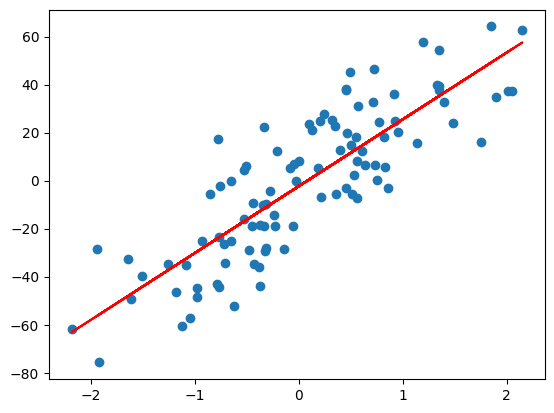

In [48]:
plt.scatter(X,y)
plt.plot(X,lr.predict(X),color='red')
plt.show()


In [60]:
class GDRegressor :
    def __init__(self,learning_rate,epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    def fit(self,X,y):
        # calculate b 
        for  i in range(self.epochs):
            loss_slope_b = -2*np.sum(y-self.m*X.ravel()-self.b)
            loss_slope_m = -2 *np.sum((y-self.m*X.ravel()-self.b)*X.ravel())
            self.b = self.b - self.lr*loss_slope_b
            self.m = self.m - self.lr*loss_slope_m
        print(self.b,self.m)
    
    def predict(self,X):
        return self.m*X.ravel()+self.b
            

In [61]:
gd = GDRegressor(0.001,50)

In [78]:
gd.fit(X_train,y_train)

-2.2709893455389714 28.125891702177178


In [79]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.6345162275128353

In [63]:
gd.predict(X)

array([-22.13004587, -14.46803398, -14.93031641,  24.22481941,
         4.3220791 ,  21.67440917,  -9.07267152,   2.84916767,
       -22.36969544, -14.266255  ,  53.79864004,   8.75884689,
         3.48535872,  -8.76923699, -23.69550079,  10.31541979,
        15.51330493,   7.70913832, -47.25904197,  46.39456556,
       -24.26231913, -16.55078722, -28.14130775,  57.56115677,
        -8.07119002, -47.92672634, -11.72532075, -11.26615965,
       -15.69914914, -16.86253782,  17.79820103,  19.02152826,
        10.32439521, -37.41858492, -63.18204405, -35.29775901,
         3.75403106,  34.73292872, -32.56312362,  13.35252918,
       -44.41234489,  -2.36568738, -10.04163129,  10.27794346,
        30.84655074,  23.3761659 ,  20.3878935 , -19.58543346,
        23.13667133,  29.38866195,  38.86308036, -20.42268251,
       -12.76369062, -23.86344212,  11.65100525,  35.28607828,
        17.99863937,  -4.57212324, -26.07601298,  10.6633652 ,
        -3.53801881,  -3.90071649,  50.38919567, -31.39